### Problemas Primer Parcial

In [4]:
using PyPlot
using LinearAlgebra

#### Problema 1

Se sabe que el aire frío se siente mucha más frío cuando hace viento, que lo que indica el termómetro; eso se debe al "efecto frigorífico" del viento, el cuál está asociado al aumento en el coeficiente de transferencia de calor por convección al aumentar la velocidad del aire. La temperatura equivale por enfriamiento de viento, en °F, se determina con la ecuación: $$T_{equiv}=91.4-(91.4-T_{ambiente})\times0.475-0.0203V+0.304\sqrt{V}$$
donde $V$ es la velocidad del viento, en mi/h, y $T_{ambiente}$ la temperatura del aire ambiente, en °F. Se supone que el aire ambiente es inmóvil cuando los vientos son ligeros, hasta 4 mi/h. La constante 91.4 °F en esta ecuación es la temperatura promedio de la piel de una persona en reposo, en un ambiente confortable. La temperatura equivalente con aire a $T_{ambiente}$, en movimiento a la velocidad $V$, se sentirá como si el aire estuviera a la temperatura $T_{equiv}$.

Aplique los factores de conversión adecuados para obtener una ecuación equivalente en unidades SI, donde $V$ sea la velocidad del viento, en km/h, y $T_{ambiente}$ sea la temperatura del aire ambiente en °C. Gráfique las temperatura equivalente por enfriamiento de viento, en °F y °C, en función de la velocidad del viento, entre los límites de 4 a 40 mi/h y sus correspondientes km/h, para las temperaturas ambiente de 20, 40 y 60 °F. Describa los resultados.

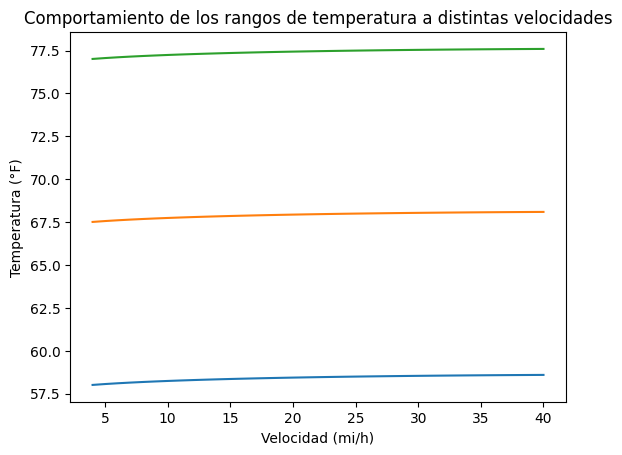

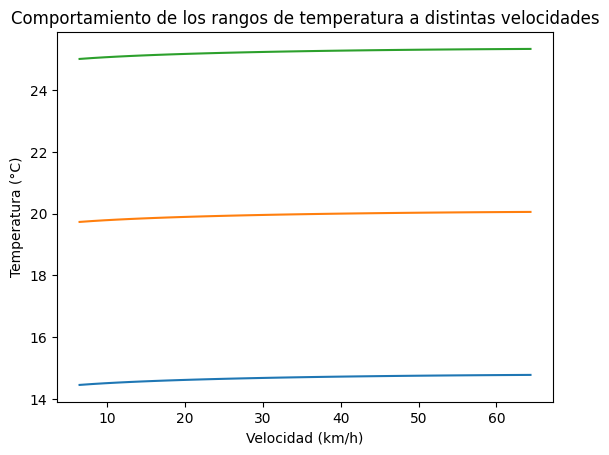

PyObject Text(24.000000000000007, 0.5, 'Temperatura (°C)')

In [2]:
Temperaturas = [20, 40, 60] #°F
Velocidades = collect(4:40) # mi/h

# Conversion de temperatura y velocidades
function F_to_C(F)
    C = (F - 32)*5/9
    return C
end

function mi_to_km(mi)
    km = mi*1.609344
    return km
end

# Ecuaciones de temperatura
function Tequiv_F(Tambiente, Velocidad)
    Tequiv_F = 91.4 - (91.4 - Tambiente) * 0.475 - 0.0203 * Velocidad + 0.304 * √Velocidad
    return Tequiv_F
end

# Ciclo para obtener perfiles
Temp_F = []
for T in Temperaturas
    for V in Velocidades 
        T_F = Tequiv_F(T, V)
        append!(Temp_F, T_F)
    end
end

# Segmentación de los resultados de acuerdo a la temperatura usada
Temp_F_20 = Temp_F[1:37]
Temp_F_40 = Temp_F[38:74] 
Temp_F_60 = Temp_F[75:end]

# Gráfico
# Unidades inglesas
figure(1)
plot(Velocidades, Temp_F_20)
plot(Velocidades, Temp_F_40)
plot(Velocidades, Temp_F_60)
title("Comportamiento de los rangos de temperatura a distintas velocidades")
xlabel("Velocidad (mi/h)")
ylabel("Temperatura (°F)")

# Unidades internacionales 
figure(2)
plot(mi_to_km(Velocidades), F_to_C.(Temp_F_20))
plot(mi_to_km(Velocidades), F_to_C.(Temp_F_40))
plot(mi_to_km(Velocidades), F_to_C.(Temp_F_60))
title("Comportamiento de los rangos de temperatura a distintas velocidades")
xlabel("Velocidad (km/h)")
ylabel("Temperatura (°C)")

#### Problema 2

La solución de la expresión: 
$$\frac{\partial{T}}{\partial t} = \frac{\partial ^2 T}{\partial x^2}$$
Considerando la condicion inicial $T(x,0)=1$ y las condiciones de frontera $T(0,t)=0$ y $T(1,t)=0$, la temperatura está dada por la serie de Fourier: 
$$T(x,t)= \displaystyle\sum_{k=1}^{\infty} \frac{4}{(2k-1)\pi}\sin{[(2k-1)\pi x]}\exp{[-(2k-1)^2\pi^2 t]}$$
Escriba un código que permita calcular las temperaturas para x = 0.1, 0.25, 0.5, 0.75 y 0.9. Considere 100 
formas diferentes de la transformada (k=1→100). Considere un minuto de operación con t en segundos 
y grafique los resultados de T con tiempos t=1→60


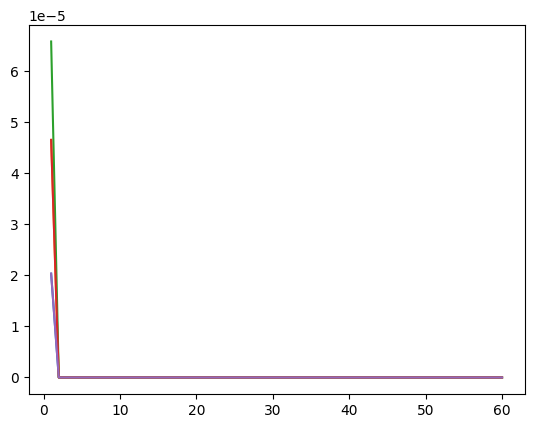

In [9]:
x_list = [0.1, 0.25, 0.5, 0.75, 0.9]
t_list = collect(1:60) #Crea un vector de 1 a 60 
k_list = collect(1:100)

function Temperatura(x_list, t_list, k_list)
    Temp_total = []
    for x in x_list
        Temp_xi = []
        for t in t_list
            Suma_k = 0
            for k in k_list
                T = (4 / ((2 * k - 1) * π)) * sin((2 * k - 1) * π * x) * exp(-(2 * k - 1)^2 * π^2 * t)
                Suma_k = Suma_k + T
            end
            append!(Temp_xi, Suma_k)
        end 
        append!(Temp_total, [Temp_xi])
    end
    for i=1:5
    plot(t_list, Temp_total[i]) 
    end   
end

Temperatura(x_list, t_list,k_list)

#### Problema 3

El sistema de embrague que se muestra en la figura se usa para transmitir par de torsión mediante una 
película de aceite con $\mu$ = 0.38 $N s /m^2$ que está entre dos discos idénticos de 30 cm de diámetro. Cuando 
la flecha impulsora gira a una velocidad de 1 450 rpm, se observa que la flecha impulsada gira a 1 398 
rpm. Suponiendo un perfil lineal de velocidad para la película de aceite, determine el par de torsión 
transmitido.

![prueba](\imagenes\P3.png)

Investigue el efecto del espesor de la película de aceite en el par de torsión transmitido. Haga 
que el espesor de la película varíe desde 0.1 mm hasta 10 mm. Trace la gráfica de los resultados que 
obtenga y exprese sus conclusiones.

##### Solución

$$T = \frac{2\pi^2\mu(n_1-n_2)D^4}{32l}$$
$$T [=] (\frac{N\cdot s}{m^2})(\frac{m^4}{min\cdot m})(\frac{min}{s}) [=] N\cdot m$$



El torque ejercido es de: 0.548503264590541 N*m


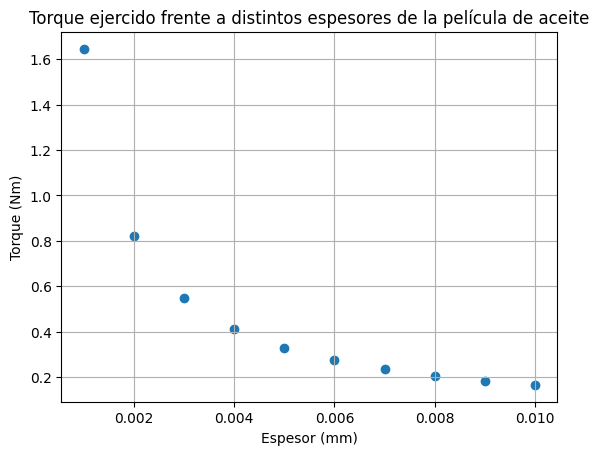

In [3]:
mu = 0.38 # Viscosidad del aceite, Ns/m
D = 30/100 # m
L = 30/100 # m
n1 = 1450 #rpm
n2 = 1398 # rpm
l = (3/1000) # Espesor de la pelicula de aceite, m

T = (2*π^2*mu*(n1-n2)*D^4)/((32*l)*60)
println("El torque ejercido es de: ", T, " N*m")

espesor = collect(0.001:0.001:0.01)
Ti = []
for i in espesor
    T = (2*π^2*mu*(n1-n2)*D^4)/((32*i)*60)
    append!(Ti, T)
end
scatter(espesor, Ti)
title("Torque ejercido frente a distintos espesores de la película de aceite")
xlabel("Espesor (mm)")
ylabel("Torque (Nm)")
grid("True")

###### Conclusión

Conforme aumenta la distancia entre las placas de disco, el torque disminuye. Es decir, para aumentar el torque trasmitido es necesario minimizar la distancia que hay entre ellas. Incorporar un aceite de mayor viscosidad puede mejorar más aun estos valores. 

#### Problema 16

In [5]:
A = [-1 1 1 1 1	0 0	0 0	0 0	0;
    0 -1 0 0 0 0 0 0 1 1 1 0; 
    0 0	0 0	-1 1 1 1 0 0 0 0;
    0 0	0 1	0 0	1 0	0 0	1 -1;
    1 0	0 0	0 0	0 0	0 0	0 0;
    0 0	0 0	-1 0 0 5 0 0 0 0;
    0 0	0 1	0 0	1 0	0 0	0 -0.84;
    -0.7 1 1 0 0 0 0 0 0 0 0 0;
    -0.55 0	0 0	0 0	0 0	1 0	0 1;
    0 0	0 0	0 0	0 0	-0.2 1 0 0;
    0 -0.85	0 0	0 0	0 0	1 0	1 0;
    0 0	0 0	0 -3.6 1 1 0 0 0 0]

b = [0; 0; 0; 0; 100; 0; 0; 0; 0; 0; 0; 0]

function GaussJordan(A, b)
    Ap = float(copy(A)) # Copia flotante para evitar que realice cambios sobre el original
    bp = float(copy(b))
    n = length(b) # Tamaño de la matriz n x n
    for k = 1:n # Indexacion del primer renglon con sus columnas

        # Pivoteo parcial
        if abs(Ap[k, k]) < 1.0e-12 # Si el valor de elemento pivote es cero (practicamente)
            for i = (k+1):n # 
                if abs(Ap[i, k]) > abs(Ap[k, k]) # Si un elemento posterior al elemento pivote es mayor
                    for j = k:n 
                        Ap[k, j], Ap[i, j] = Ap[i, j], Ap[k, j] # Intercambio de elemento pivote Ap
                    end
                    bp[k], bp[i] = bp[i], bp[k] # Intercambio de elemento (correspondiente al renglon del pivote) bp
                    break # Regresa al ciclo anterior para continuar con la eliminacion
                end
            end
        end

        # Division de la fila pivote
        pivote = Ap[k, k]
        for j = k:n
            Ap[k, j] = Ap[k, j] / pivote
        end
        bp[k] = bp[k] / pivote 

        # Proceso de eliminacion
        for i = 1:n
            if i == k || Ap[i, k] == 0
                continue
            end 
            factor = Ap[i, k]
            for j = k:n
                Ap[i, j] = Ap[i, j] - Ap[k, j]*factor
            end
            bp[i] = bp[i] - bp[k]*factor
        end
    end
    return bp
end

m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12 = GaussJordan(A, b)

12-element Vector{Float64}:
 100.0
  40.00000000000002
  29.999999999999982
   8.437499999999986
  21.562500000000014
   4.687500000000005
  12.562500000000014
   4.312500000000002
  30.000000000000014
   6.000000000000003
   3.999999999999999
  24.999999999999993

#### Problema 17

In [ ]:
Flujos = [40 60 -120; -60 60 0; 100 0 0]
Concentraciones = [200 0 400]

function GaussJordan(A, b)
    Ap = float(copy(A)) # Copia flotante para evitar que realice cambios sobre el original
    bp = float(copy(b))
    n = length(b) # Tamaño de la matriz n x n
    for k = 1:n # Indexacion del primer renglon con sus columnas

        # Pivoteo parcial
        if abs(Ap[k, k]) < 1.0e-12 # Si el valor de elemento pivote es cero (practicamente)
            for i = (k+1):n # 
                if abs(Ap[i, k]) > abs(Ap[k, k]) # Si un elemento posterior al elemento pivote es mayor
                    for j = k:n 
                        Ap[k, j], Ap[i, j] = Ap[i, j], Ap[k, j] # Intercambio de elemento pivote Ap
                    end
                    bp[k], bp[i] = bp[i], bp[k] # Intercambio de elemento (correspondiente al renglon del pivote) bp
                    break # Regresa al ciclo anterior para continuar con la eliminacion
                end
            end
        end

        # Division de la fila pivote
        pivote = Ap[k, k]
        for j = k:n
            Ap[k, j] = Ap[k, j] / pivote
        end
        bp[k] = bp[k] / pivote 

        # Proceso de eliminacion
        for i = 1:n
            if i == k || Ap[i, k] == 0
                continue
            end 
            factor = Ap[i, k]
            for j = k:n
                Ap[i, j] = Ap[i, j] - Ap[k, j]*factor
            end
            bp[i] = bp[i] - bp[k]*factor
        end
    end
    #=
    println("Matriz identidad")
    println(Ap)
    println("Solucion x[i]")
    println(bp)
    =#
    return bp
end

c1, c2, c3 = GaussJordan(Flujos, Concentraciones)
println("Concentracion del reactor 1: ", c1, " mg/m^3")
println("Concentracion del reactor 2: ", c2, " mg/m^3")
println("Concentracion del reactor 3: ", c3, " mg/m^3")

#### Problema 20

Ajuste lineal
 y = 1.0589673913043478x +0.8179347826086957
Con r = 0.9517528179009624
Esfuerzo a la tensión en a los 32 min: 34.704891304347825


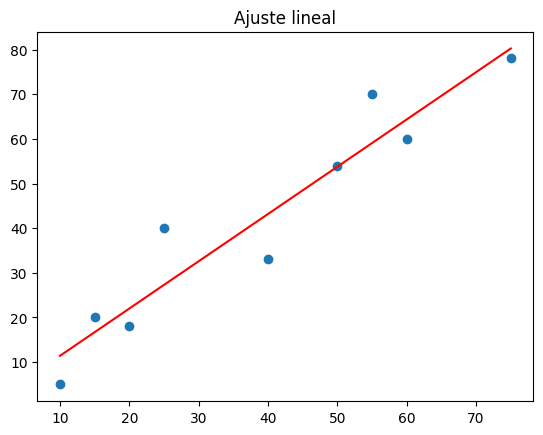

In [6]:
Tiempo = [10 15 20 25 40 50 55 60 75]
Esfuerzo = [5 20 18 40 33 54 70 60 78]
function RegresionLineal(x, y)
    N = length(x) # Elementos totales 
    suma_x = 0 # Inicializadores 
    suma_y = 0
    suma_xy = 0
    suma_x2 = 0
    suma_y2 = 0
    for i=1:N # Acumuladores
        suma_x = suma_x + x[i]
        suma_y = suma_y + y[i]
        suma_xy = suma_xy + x[i]*y[i]
        suma_x2 = suma_x2 + x[i]^2
        suma_y2 = suma_y2 + y[i]^2
    end 
    # Coeficientes y = ax + b
    a = (N*suma_xy - suma_x*suma_y)/(N*suma_x2 - suma_x^2)
    b = (suma_x2*suma_y - suma_x*suma_xy)/(N*suma_x2 - suma_x^2)
    yn = []
    for i=1:N
        append!(yn, a*x[i]+b)
    end
    # Calculo del ajuste r
    x_media = suma_x/N
    y_media = suma_y/N
    xy_media = suma_xy/N
    x2_media = suma_x2/N
    y2_media = suma_y2/N
    r = (xy_media - x_media*y_media)/(√(x2_media - x_media^2)*√(y2_media - y_media^2))
    return a, b, r, yn
end

a, b , r, yn = RegresionLineal(Tiempo, Esfuerzo)
scatter(Tiempo, Esfuerzo)
plot(transpose(Tiempo), yn, "r")
title("Ajuste lineal")
println("Ajuste lineal")
println(" y = ", a, "x +", b, "\nCon r = ", r)
t_32 = a*32 + b
println("Esfuerzo a la tensión en a los 32 min: ", t_32)

#### Problema 21

Ajuste cuadratico
 y = (702.4582321387022) + (-1.9033039552149187) x + (0.0012754650701840846) x^2
Con r = 0.9960766734810965


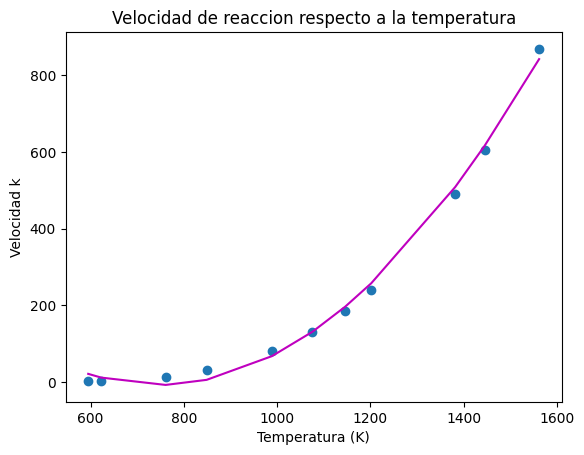

In [7]:
T = [595 623 761 849 989 1076 1146 1202 1382 1445 1562] # K
k = [2.12 3.12 14.4 30.6 80.3 131 186 240 489 605 868] # x10^20 (m^3/s)

function RegresionCuadratica(x, y)
    x = float(x)
    y = float(y)
    n = length(x)
    suma_x = 0
    suma_x2 = 0
    suma_y = 0
    suma_x3 = 0
    suma_xy = 0
    suma_x4 = 0
    suma_x2y = 0
    for i=1:n
        suma_x = suma_x + x[i]
        suma_x2 = suma_x2 + x[i]^2
        suma_y = suma_y + y[i]
        suma_x3 = suma_x3 + x[i]^3
        suma_xy = suma_xy + x[i]*y[i]
        suma_x4 = suma_x4 + x[i]^4
        suma_x2y = suma_x2y + y[i]*x[i]^2
    end
    # Resolución de matriz con regla de Cramer
    A = [n suma_x suma_x2; suma_x suma_x2 suma_x3; suma_x2 suma_x3 suma_x4]
    b = [suma_y; suma_xy; suma_x2y]
    tam_matriz = size(A)
    DetA = det(A)
    ai = [] # [a0, a1, a2]
    for i=1:tam_matriz[1]
        Apivot = copy(A)
        Apivot[:,i] = b
        DetApivot = det(Apivot)
        a = DetApivot/DetA
        append!(ai, a)
    end
    # Aproximacion a los resultados
    yn = []
    for i = 1:n
        append!(yn, ai[1] + ai[2]*x[i] + ai[3]*x[i]^2)
    end
    # Cálculo del coeficiente de correlacion
    media_y = suma_y/n
    suma_1 = 0
    suma_2 = 0
    for i=1:n
        suma_1 = suma_1 + (y[i] - media_y)^2
        suma_2 = suma_2 + (y[i] - ai[1] - ai[2]*x[i] - ai[3]*x[i]^2)^2
    end 
    r = (suma_1 - suma_2)/suma_1
    return ai, r, yn
end

ai, r, yn = RegresionCuadratica(T, k)

scatter(T, k)
plot(transpose(T), yn, "m")
title("Velocidad de reaccion respecto a la temperatura")
xlabel("Temperatura (K)")
ylabel("Velocidad k")
println("Ajuste cuadratico")
println(" y = (", ai[1], ") + (", ai[2], ") x + (", ai[3], ") x^2\nCon r = ", r)

#### Problema 3

La brecha entre los dos discos se puede modelar como dos placas paralelas de área $A$ separadas por un fluido con espesor $l$ y viscosidad $\mu$. La fuerza necesaria para mover una de las placas a una velocidad constante $V$ al mismo tiempo que la placa inferior permanece en reposo es:
$$F = \mu A\cdot\frac{V}{l}$$
El par de torsión (torque), donde $R$ es el radio del cilindro interior $$T = FR$$
$$T = \mu A\cdot\frac{V}{l}\cdot R$$
dado que la velocidad $V$ se puede expresar en terminos del radio por la velocidad angular $$V = \omega R$$ y esta ultima en terminos de $2\pi$ rad por la cantidad de vueltas dadas cada minuto 
$$\omega = 2\pi n$$ 
tenemos que: 
$$T = \mu \frac{4\pi^2R^3Ln}{l}$$

Análisis dimensional
$$T [=] (\frac{Ns}{m^2})(\frac{m^3 \cdot m}{m\cdot min})(\frac{1 min}{60 s}) [=] N\cdot m$$